**Fall 2024**
<img src="https://www.cuipcairo.org/sites/default/files/styles/medium/public/49658177_2020840098011471_2893445443553853440_n.png?itok=672tzxcF"
 width="80px" align="right">

**University of Science and Technology, Zewail City**

####**Math 404, Linear and Non-linear Programming**

<br>

**<h1 align="center">Big Data Final Project</h3>**

**<h1 align="center">Movie Recommender Systems using Spark with PySpark</h3>**

# ***Team Members:***
**Riham Mohamed - 201901639**

**Hajar Fawzi - 201900537**

**Aya Nageh - 201901317**

**Samaa Khair -201901481**

# **Introduction**
##**Movie Recommender Systems using Spark with PySpark:**
***
**Our project aims to develop a movie recommendation system utilizing explicit feedback, specifically movie ratings provided by users. The chosen approach for this recommendation system is Alternating Least Squares (ALS) - Collaborative Filtering.**


<b>Collaborative Filtering:</b>
This approach involves making predictions about a user's interests by gathering preferences or taste information from multiple users. The underlying assumption is that if User A shares the same opinion as User B on one topic, they are more likely to have a similar opinion on a different topic X compared to a randomly chosen user.


<b>ALS:</b> ALS is a low-rank matrix approximation algorithm used for collaborative filtering. It decomposes the user-item matrix into two low-rank matrices: the user matrix and the item matrix. Collaborative filtering represents users and products with a small set of latent factors, which can be used to predict missing entries. The ALS algorithm learns these latent factors through matrix factorization.

# **Installations and Imports:**

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark py4j
!ls

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=0fe440a0d6a98e95039074cdf0a5753aac05fc3d18ce00b83a5c77220d548f50
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark
sample_data  spark-3.1.1-bin-hadoop3.2	spark-3.1.1-bin-hadoop3.2.tgz


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()
import pyspark
import  pyspark.sql.functions as fn

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('recommendation').getOrCreate()

Spark MLlib library for Machine Learning provides a Collaborative Filtering implementation by using Alternating Least Squares. The implementation in MLlib has these parameters:

* numBlocks is the number of blocks used to parallelize computation (set to -1 to auto-configure).
* rank is the number of latent factors in the model.
* iterations is the number of iterations to run.
* lambda specifies the regularization parameter in ALS.
* implicitPrefs specifies whether to use the explicit feedback ALS variant or one adapted for implicit feedback data.
* alpha is a parameter applicable to the implicit feedback variant of ALS that governs the baseline confidence in preference observations.

Let's see this all in action!

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS

# **Reading Data and Understanding it:**

##**Reading Data by Spark:**

In [ ]:
data = spark.read.csv('/content/ratings.csv',inferSchema=True,header=True)

##**Joining movies.csv to be able to display the movie's title and genre not just its ID:**



In [ ]:
movie_names_df = spark.read.csv("/content/movies.csv", header=True)
joined_df = data.join(movie_names_df, on="movieId")

##**Data Exploration:**

In [ ]:
data.head()

Row(userId=1, movieId=296, rating=5.0, timestamp=1147880044)

In [ ]:
data.show(5)

+------+-------+------+----------+
|userId|movieId|rating| timestamp|
+------+-------+------+----------+
|     1|    296|   5.0|1147880044|
|     1|    306|   3.5|1147868817|
|     1|    307|   5.0|1147868828|
|     1|    665|   5.0|1147878820|
|     1|    899|   3.5|1147868510|
+------+-------+------+----------+
only showing top 5 rows



In [ ]:
data.printSchema()

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp: integer (nullable = true)



In [ ]:
joined_df.printSchema()

root
 |-- movieId: integer (nullable = true)
 |-- userId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)



In [ ]:
data.describe().show()

+-------+-----------------+------------------+------------------+--------------------+
|summary|           userId|           movieId|            rating|           timestamp|
+-------+-----------------+------------------+------------------+--------------------+
|  count|            85378|             85378|             85378|               85378|
|   mean| 333.833399704842|20759.013481224672|3.5831186019817753|1.2012927515033848E9|
| stddev|192.3816976054516| 38025.83461808215|1.0349429738054163| 2.328003642944829E8|
|    min|                1|                 1|               0.5|           828163431|
|    max|              647|            205106|               5.0|          1574253766|
+-------+-----------------+------------------+------------------+--------------------+



In [ ]:
joined_df.describe().show()

+-------+------------------+------------------+------------------+--------------------+--------------------+------------------+
|summary|           movieId|            userId|            rating|           timestamp|               title|            genres|
+-------+------------------+------------------+------------------+--------------------+--------------------+------------------+
|  count|             85378|             85378|             85378|               85378|               85378|             85378|
|   mean|20759.013481224672|  333.833399704842|3.5831186019817753|1.2012927515033848E9|                null|              null|
| stddev| 38025.83461808231|192.38169760544895|1.0349429738054245|2.3280036429448253E8|                null|              null|
|    min|                 1|                 1|               0.5|           828163431|     $5 a Day (2008)|(no genres listed)|
|    max|            205106|               647|               5.0|          1574253766|Принцесса и Людое

#**Visualization of the data**

## **Showing average ratings for The First 10 users:**

In [ ]:
average_ratings = data.select("userId", "Rating") \
                       .filter(data["userId"].isNotNull()) \
                       .filter(data["Rating"].isNotNull()) \
                       .groupBy("userId") \
                       .agg(fn.avg("Rating").alias("Average Rating")) \
                       .limit(10)

# Display the results
average_ratings.show()

+------+------------------+
|userId|    Average Rating|
+------+------------------+
|   148| 4.128787878787879|
|   463|3.9047619047619047|
|   471| 4.051282051282051|
|   496|3.8870967741935485|
|   243| 2.787878787878788|
|   392| 4.638888888888889|
|   540|               4.5|
|   623|3.4901960784313726|
|    31| 2.431077694235589|
|   516| 3.590909090909091|
+------+------------------+



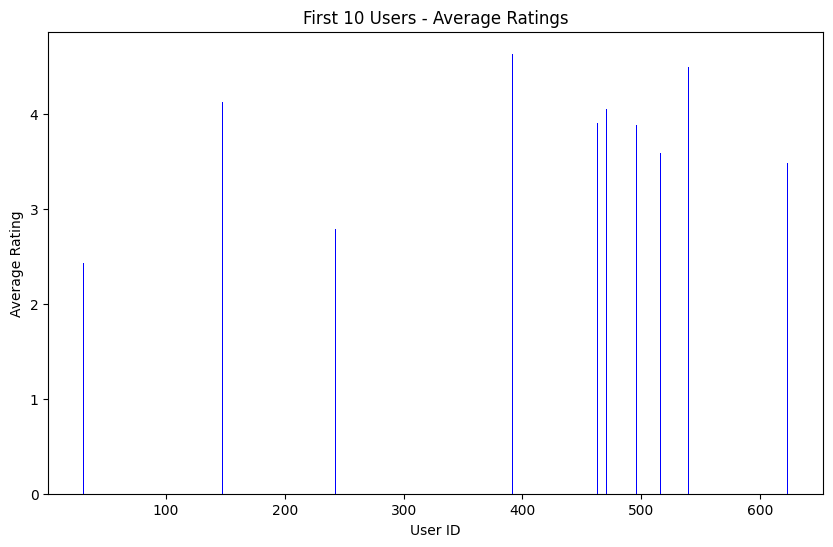

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming average_ratings is a DataFrame from your Spark code
# Convert it to a Pandas DataFrame for easy plotting
average_ratings_pd = average_ratings.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(average_ratings_pd['userId'], average_ratings_pd['Average Rating'], color='blue')
plt.title('First 10 Users - Average Ratings')
plt.xlabel('User ID')
plt.ylabel('Average Rating')
plt.show()

## **Top five movie for all users (based on ratings), and Showing the first 5 users:**

In [ ]:
from pyspark.sql import Window

windowSpec = Window.partitionBy("userId").orderBy(fn.desc("Rating"))
top5_ratings = joined_df.withColumn("rank", fn.row_number().over(windowSpec)) \
                         .filter(fn.col("rank") <= 5) \
                         .select("userId", "title", "Rating","genres")

top5_ratings.show()

+------+--------------------+------+--------------------+
|userId|               title|Rating|              genres|
+------+--------------------+------+--------------------+
|   148| Pulp Fiction (1994)|   5.0|Comedy|Crime|Dram...|
|   148|Shawshank Redempt...|   5.0|         Crime|Drama|
|   148|Schindler's List ...|   5.0|           Drama|War|
|   148|Dr. Strangelove o...|   5.0|          Comedy|War|
|   148|2001: A Space Ody...|   5.0|Adventure|Drama|S...|
|   463|         Heat (1995)|   5.0|Action|Crime|Thri...|
|   463|Dead Man Walking ...|   5.0|         Crime|Drama|
|   463| White Squall (1996)|   5.0|Action|Adventure|...|
|   463|Birdcage, The (1996)|   5.0|              Comedy|
|   463|    Rock, The (1996)|   5.0|Action|Adventure|...|
|   471|Harry Potter and ...|   5.0|Adventure|Childre...|
|   471|Harry Potter and ...|   5.0|Adventure|Fantasy...|
|   471|Harry Potter and ...|   5.0|Action|Adventure|...|
|   471| Intouchables (2011)|   5.0|        Comedy|Drama|
|   471| Inter

<ipython-input-38-f4719960500c>:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis))


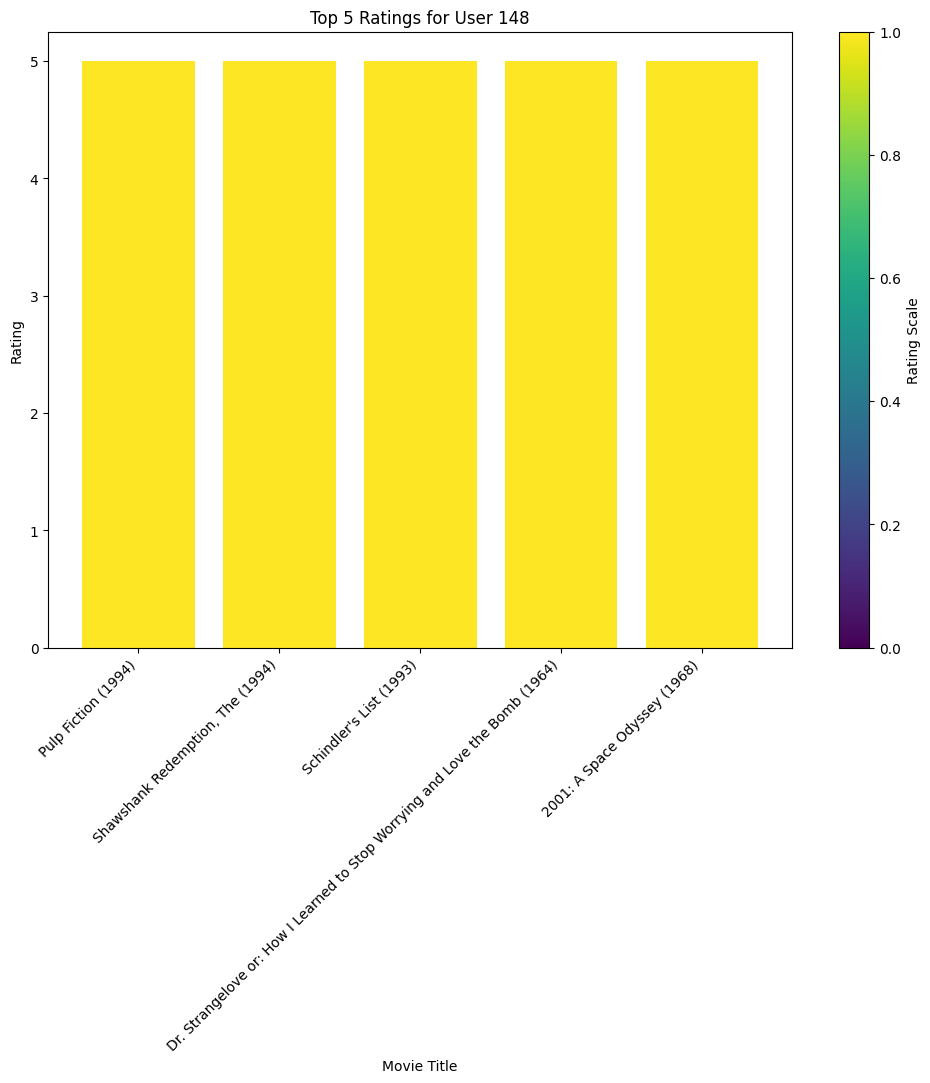

<ipython-input-38-f4719960500c>:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis))


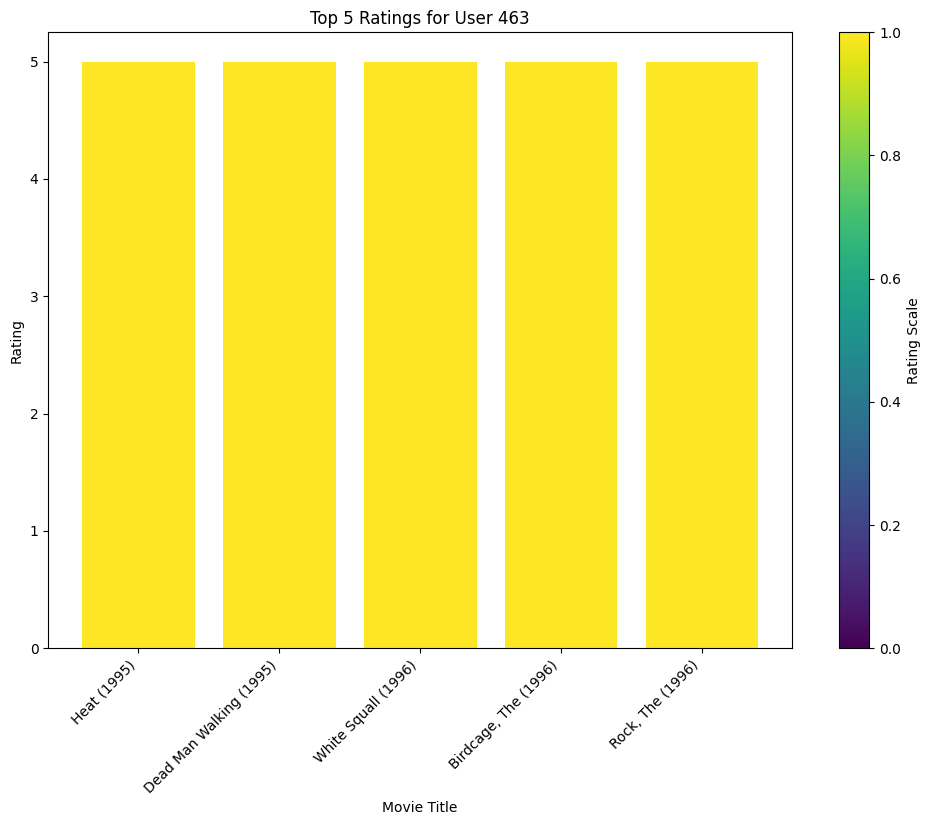

<ipython-input-38-f4719960500c>:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis))


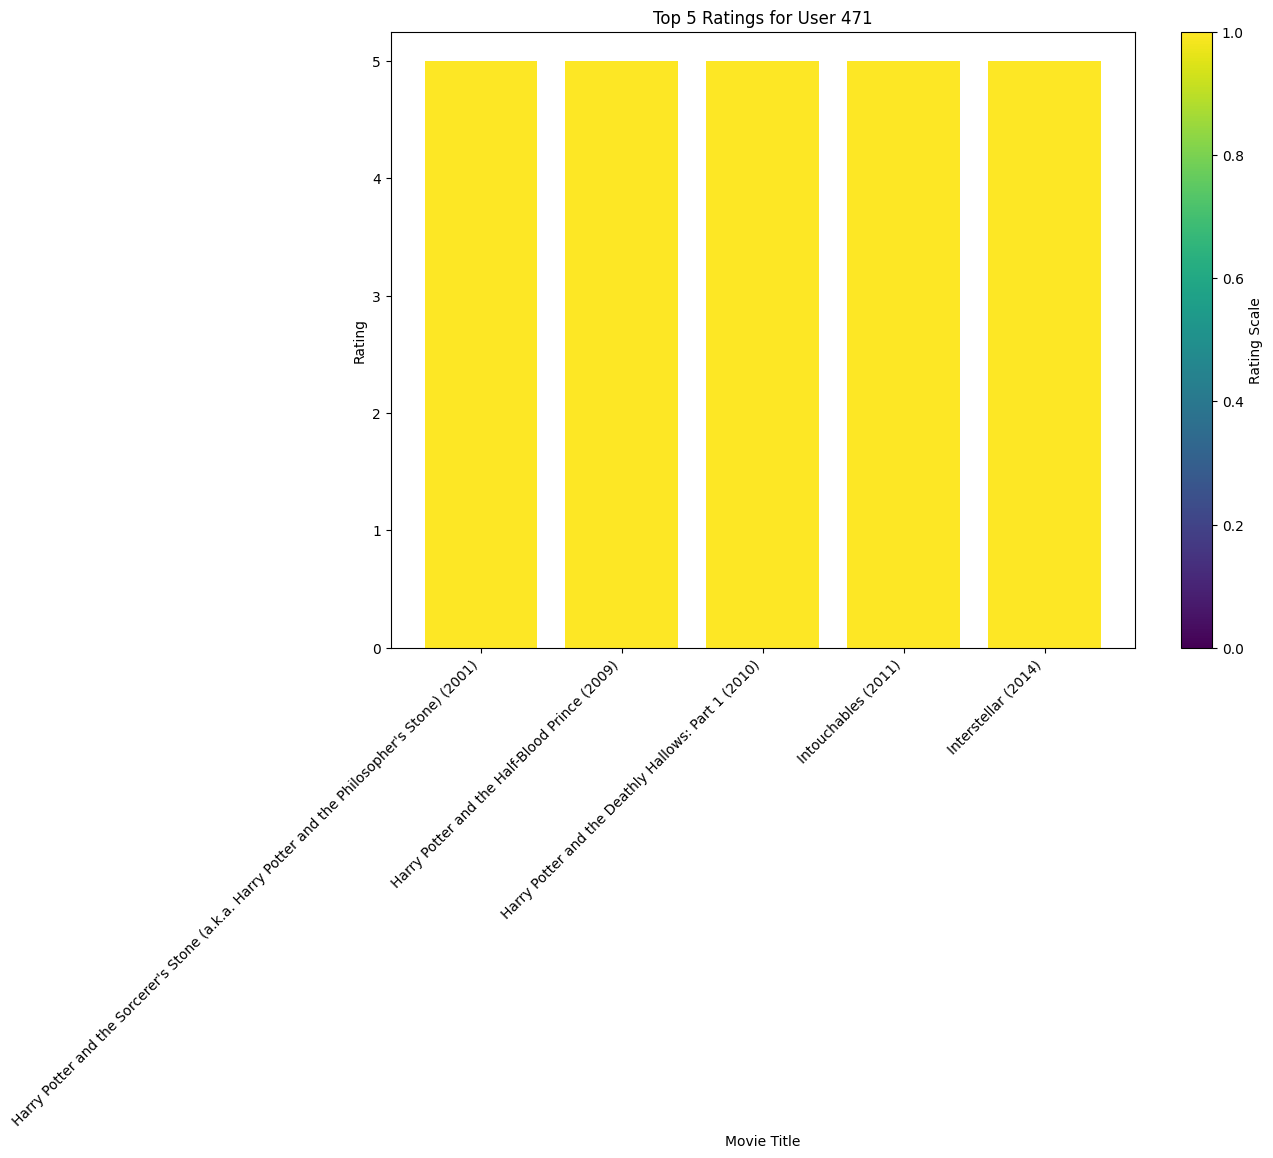

<ipython-input-38-f4719960500c>:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis))


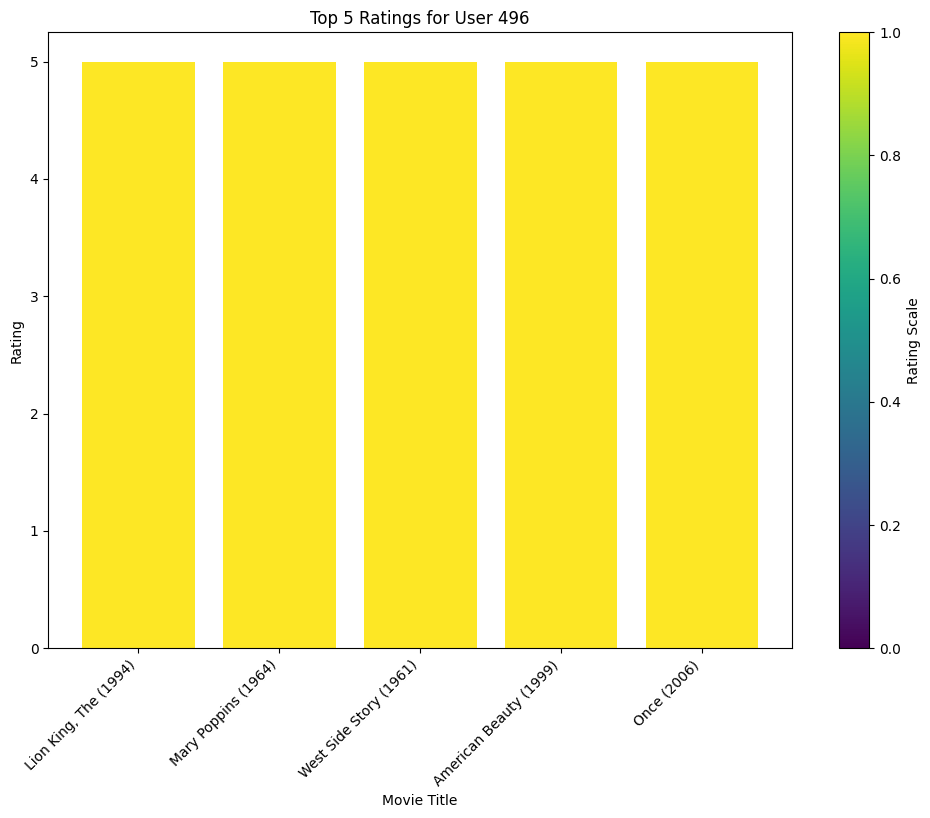

<ipython-input-38-f4719960500c>:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis))


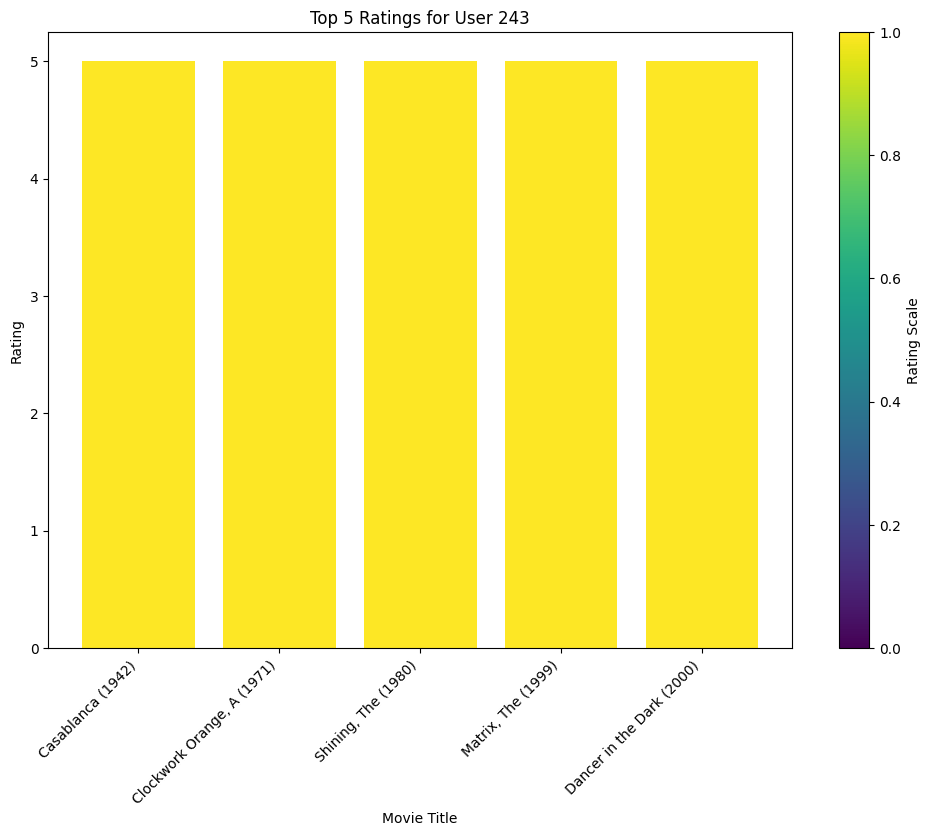

In [ ]:
user_ids = [row.userId for row in top5_ratings.select("userId").distinct().collect()]
for ID in user_ids[0:5]:
  # Filter top5_ratings for only the desired user
  user_top5_ratings_pd = top5_ratings.filter(top5_ratings['userId'] == ID).toPandas()

  # Create a bar chart
  fig, ax = plt.subplots(figsize=(12, 8));
  colors = plt.cm.viridis(user_top5_ratings_pd['Rating'] / user_top5_ratings_pd['Rating'].max());
  bars = ax.bar(user_top5_ratings_pd['title'], user_top5_ratings_pd['Rating'], color=colors);

  # Add labels and title
  ax.set_xlabel('Movie Title')
  ax.set_ylabel('Rating')
  ax.set_title(f'Top 5 Ratings for User {ID}')

  # Add colorbar
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis))
  cbar.set_label('Rating Scale')

  # Rotate x-axis labels for better readability
  plt.xticks(rotation=45, ha='right')

  # Display the plot
  plt.show();

##**The Highest-Rated Movies:**

**Filtering:**

In [ ]:
movie_avg_ratings = joined_df.groupBy('movieId').avg('rating').toPandas()
# Sort the DataFrame by average rating in descending order
sorted_ratings = movie_avg_ratings.sort_values(by='avg(rating)', ascending=False)

# Select the top 5 highest rated movies
top5_movies = sorted_ratings.head(5)

**Visualization:**

<ipython-input-46-84a0cfc66bcd>:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis))


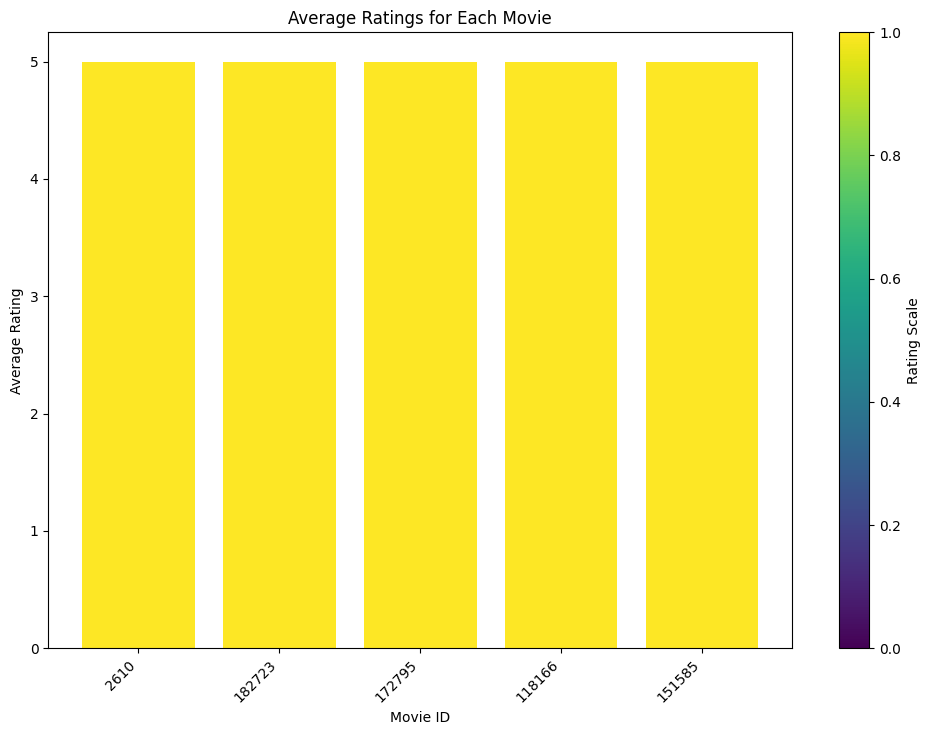

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.viridis(top5_movies['avg(rating)'] / top5_movies['avg(rating)'].max())
bars = ax.bar(top5_movies['movieId'].astype(str), top5_movies['avg(rating)'], color=colors)

# Add labels and title
ax.set_xlabel('Movie ID')
ax.set_ylabel('Average Rating')
ax.set_title('Average Ratings for Top five Movies')

# Add colorbar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis))
cbar.set_label('Rating Scale')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

##**The Lowest-Rated Movies:**

**Filtering:**

In [ ]:
# Select the lowest 5 rated movies
Bottom5_movies = sorted_ratings.tail(5)

**Visualization:**

<ipython-input-51-f143ac6829db>:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis))


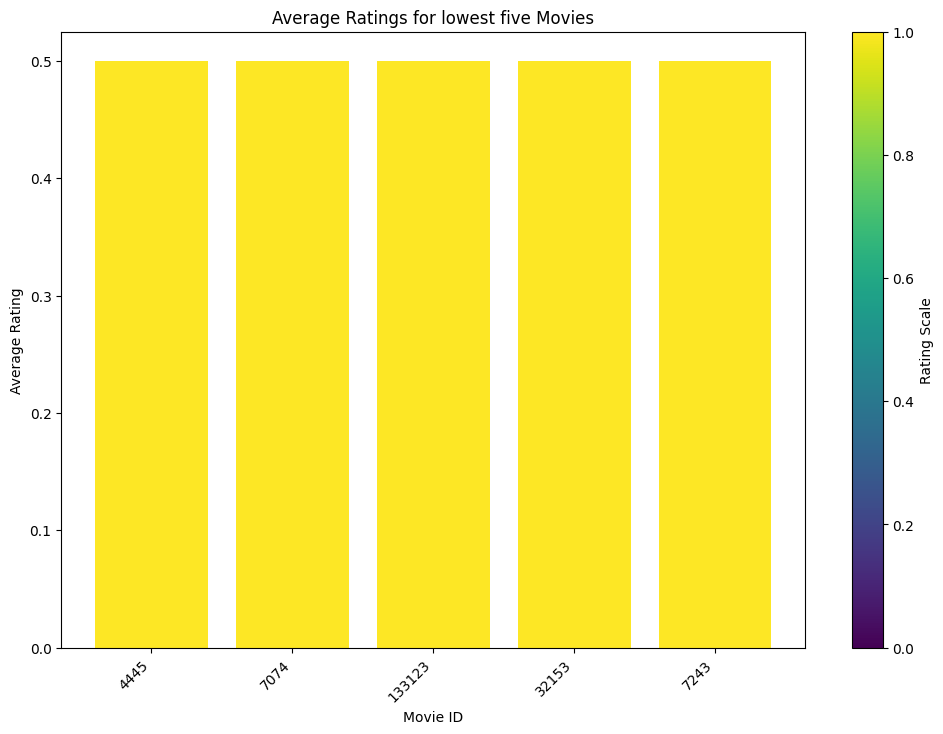

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.viridis(Bottom5_movies['avg(rating)'] / Bottom5_movies['avg(rating)'].max())
bars = ax.bar(Bottom5_movies['movieId'].astype(str), Bottom5_movies['avg(rating)'], color=colors)

# Add labels and title
ax.set_xlabel('Movie ID')
ax.set_ylabel('Average Rating')
ax.set_title('Average Ratings for lowest five Movies')

# Add colorbar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis))
cbar.set_label('Rating Scale')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

##**The Most Active Users:**

**Filtering:**

In [ ]:
Users = joined_df.groupBy('userId').count().toPandas()
# Sort the DataFrame by average rating in descending order
sorted_Users = Users.sort_values(by='count', ascending=False)

# Select the top 5 Active users
top5_Users = sorted_Users.head(5)

**Visualization:**

<ipython-input-58-2646eb76cb91>:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis));


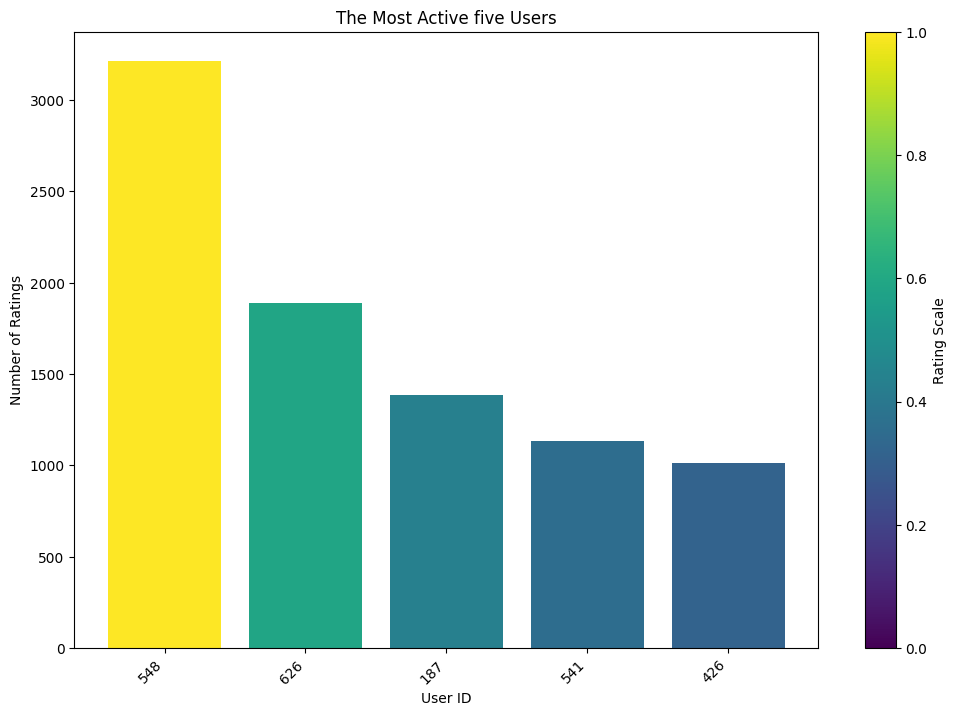

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.viridis(top5_Users['count'] / top5_Users['count'].max())
bars = ax.bar(top5_Users['userId'].astype(str), top5_Users['count'], color=colors);

# Add labels and title
ax.set_xlabel('User ID')
ax.set_ylabel('Number of Ratings')
ax.set_title('The Most Active five Users')

# Add colorbar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis));
cbar.set_label('Rating Scale')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

## **The Most Popular Genres**

In [ ]:
Genres = joined_df.groupby('genres').count().orderBy('count', ascending=False).toPandas()

# Select the top 5 Genres
top5_Genres= Genres.head(5)

<ipython-input-62-e868efc086b6>:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis));


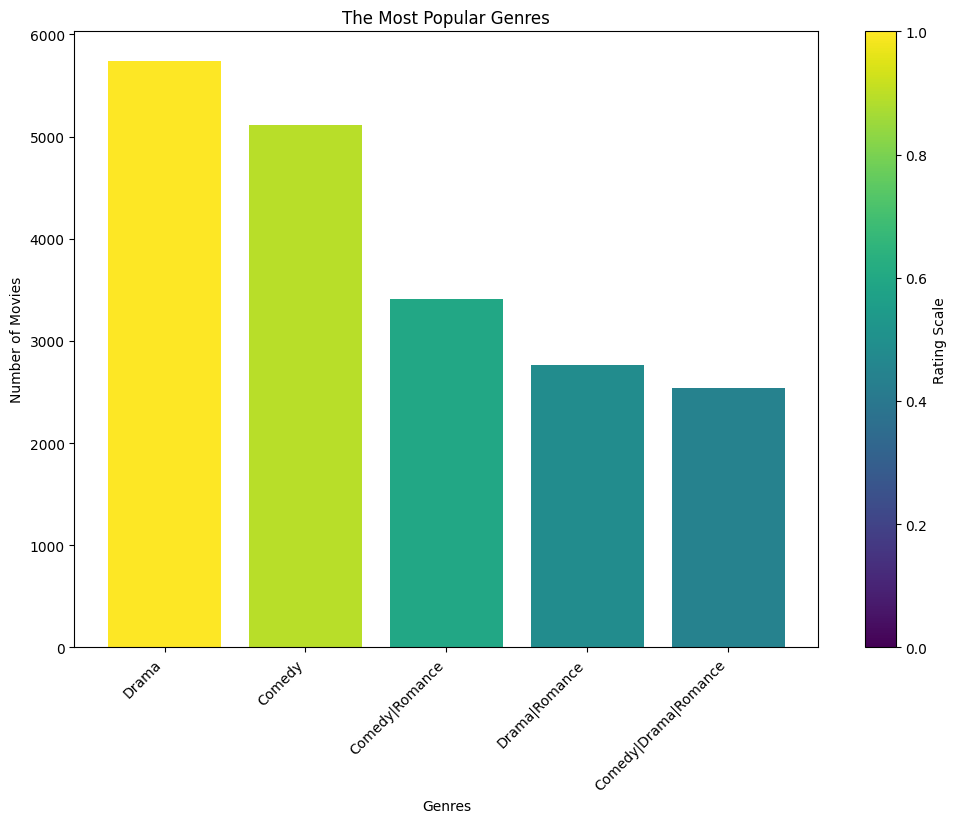

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.viridis(top5_Genres['count'] / top5_Genres['count'].max())
bars = ax.bar(top5_Genres['genres'].astype(str), top5_Genres['count'], color=colors);

# Add labels and title
ax.set_xlabel('Genres')
ax.set_ylabel('Number of Movies')
ax.set_title('The Most Popular Genres')

# Add colorbar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis));
cbar.set_label('Rating Scale')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

# **Recommendation System:**

##**Splitting the data to evaluate how well our model performed:**

**Dataset is splitted randomlly with ratio 80%:20%**

In [ ]:
(train_data, test_data) = data.randomSplit([0.8, 0.2], seed=42)

## **Building the recommendation model using ALS on the training data:**

In [ ]:
als = ALS(maxIter=5, regParam=0.01, userCol="userId", itemCol="movieId", ratingCol="rating")
model = als.fit(train_data)

## **Evaluating the model by computing the RMSE on the test data:**

In [ ]:
predictions = model.transform(test_data)

In [ ]:
predictions.show()

+------+-------+------+----------+----------+
|userId|movieId|rating| timestamp|prediction|
+------+-------+------+----------+----------+
|   897|    471|   4.0|1123038574| 2.6350696|
|    12|    471|   4.0|1167582388|  3.688876|
|   346|    471|   5.0| 944899384| 3.8748653|
|   846|    471|   3.0|1074137506| 3.1752512|
|   318|    471|   4.0|1131659142|  4.135738|
|   263|    471|   5.0| 996856361|  4.063207|
|    72|    471|   5.0| 982866659| 3.5284271|
|   229|    471|   5.0| 841251657|  4.162153|
|   823|    471|   3.0| 840034949| 3.2270644|
|   450|    471|   3.0|1439794187| 3.1945553|
|   427|    471|   4.0| 844455322| 4.1143055|
|   201|    471|   2.0| 938860946| 3.9028337|
|   124|    471|   4.0| 833211931| 3.6844134|
|   215|    471|   5.0|1051831051| 2.9504569|
|   516|    833|   3.0| 849436567| 3.9272184|
|   695|    833|   1.0| 941482804| 2.0133755|
|   226|    833|   1.5|1059582381| 1.3919727|
|   626|   1088|   4.0| 953850939| 3.5739214|
|   860|   1088|   1.0|1111552115|

In [ ]:
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating",predictionCol="predictedRating")
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))

Root-mean-square error = nan


## **Testing the Recommendation System on User --> ID = 12**

In [ ]:
single_user = test_data.filter(test_data['userId']==12).select(['movieId','userId'])

In [ ]:
single_user.show()

+-------+------+
|movieId|userId|
+-------+------+
|      1|    12|
|     50|    12|
|     88|    12|
|    101|    12|
|    140|    12|
|    163|    12|
|    203|    12|
|    209|    12|
|    257|    12|
|    319|    12|
|    351|    12|
|    377|    12|
|    435|    12|
|    441|    12|
|    442|    12|
|    471|    12|
|    489|    12|
|    497|    12|
|    508|    12|
|    524|    12|
+-------+------+
only showing top 20 rows



**Obviously,** This User had 10 ratings in the test data set


In [ ]:
reccomendations = model.transform(single_user)

In [ ]:
reccomendations.orderBy('prediction',ascending=False).show()

+-------+------+----------+
|movieId|userId|prediction|
+-------+------+----------+
|   2973|    12| 4.5488744|
|     50|    12| 4.3531327|
|   1175|    12| 4.3438926|
|   1339|    12|  4.298664|
|    858|    12|  4.282729|
|   1784|    12| 4.2675834|
|   3608|    12| 4.2308517|
|   3317|    12| 4.2263317|
|   2739|    12| 4.2058125|
|   1136|    12|   4.19502|
|   2918|    12|  4.182405|
|   1079|    12| 4.1704097|
|    527|    12|  4.161964|
|   1269|    12|  4.125409|
|    562|    12|  4.106319|
|   1246|    12|  4.092672|
|   2248|    12| 4.0805793|
|   3363|    12| 4.0359516|
|   1641|    12| 4.0161777|
|  55820|    12| 3.9792094|
+-------+------+----------+
only showing top 20 rows



**So,**

We can recommend the **movie with id 2973** to this user (ID = 12). The user might like those based on previous history.

The Movie is **Crimes and Misdemeanors (1989)**
With Genres: **Comedy|Crime|Drama**

## **Testing the Recommendation System on User --> ID = 50**

In [ ]:
single_user = test_data.filter(test_data['userId']==50).select(['movieId','userId'])

In [ ]:
single_user.show()

+-------+------+
|movieId|userId|
+-------+------+
|    344|    50|
|    780|    50|
|   1513|    50|
|   1608|    50|
|   2396|    50|
|   2706|    50|
|   2918|    50|
|   3255|    50|
|   3825|    50|
|   3949|    50|
|   4447|    50|
|   7438|    50|
|  89745|    50|
+-------+------+



**Obviously,** This User had 10 ratings in the test data set


In [ ]:
reccomendations = model.transform(single_user)

In [ ]:
reccomendations.orderBy('prediction',ascending=False).show()

+-------+------+----------+
|movieId|userId|prediction|
+-------+------+----------+
|   2396|    50|  5.422282|
|    344|    50|  5.375739|
|  89745|    50| 4.9112573|
|   7438|    50| 4.8978343|
|   3255|    50|  4.855571|
|   2918|    50| 4.4212127|
|    780|    50|  4.085129|
|   4447|    50| 3.4552262|
|   3825|    50| 3.2793834|
|   1513|    50|  3.183668|
|   2706|    50| 2.7511005|
|   3949|    50| 2.3404953|
|   1608|    50| 2.0940182|
+-------+------+----------+



**So,**

We can recommend the **movie with id 2396** to this user (ID = 50). The user might like those based on previous history.

The movie is **Shakespeare in Love (1998**),
with Genres: **Comedy|Drama|Romance**